## Bogotá 1 - Data Exploration

In this notebook, you will explore the Bogotá air quality data. The dataset you will be using is obtained from the [RMCAB](http://201.245.192.252:81/home/map). The steps you will complete in this notebook are the following: 

1. Import Python packages
2. Load the dataset
3. Count null values
4. Plot histograms of different pollutants
5. Make boxplots of pollutants at each measurement station
6. Investigate scatterplots of different pollutants and look for correlation
7. Generate simultaneous scatterplots and histograms across all pollutants
8. Construct a corrlation matrix to quantitatively loook for correlation
9. Look at measurements over time for different pollutants at different stations
10. Visualize the data in a map representation



## 1. Import Python packages

Run the next cell to import the Python packages you'll be using in this lab exercise. This is a common first step whenever working with Python. If everything goes well you should see a message when the cell has finished running that says "All packages imported successfully!".

In [1]:
import numpy as np
import pandas as pd
import os, re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import ipywidgets as widgets
import folium 
from folium.plugins import FastMarkerCluster
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime

print('All packages imported successfully!')

All packages imported successfully!


## 2. Load the data

Run the next cell to load the Bogotá air quality data. In this case you are using the `pandas` package to read the csv file containing the data into a "dataframe" called `raw_data`. A dataframe is just a convenient format you can use for accessing and manipulating the data. With the second line of code you will modify the `DateTime` column for better formatting and with the third line you are printing out the first five lines of the dataframe. 

In [2]:
# this is a code comment! 
# code comments always start with a "#" symbol
# you'll see comments throughout the code describing what the code is doing

# read in the data
raw_data = pd.read_csv('data/data_final_with_missing.csv')
# modify the DateTime column format
raw_data['DateTime'] = utils.fix_dates(raw_data['DateTime'] )
# print out the first few lines in the dataframe
raw_data.head(5)

,PM10,PM2.5,NO,NO2,NOX,CO,OZONO,Station,DateTime
0,56.6,32.7,7.504,15.962,23.493,0.44924,2.431,USM,2021-01-01 00:00:00
1,59.3,39.3,16.560,17.866,34.426,0.69832,1.121,USM,2021-01-01 01:00:00
2,96.4,70.8,22.989,17.802,40.791,0.88243,1.172,USM,2021-01-01 02:00:00
3,108.3,81.0,3.704,9.886,13.591,0.29549,6.565,USM,2021-01-01 03:00:00
4,87.7,56.1,2.098,9.272,11.371,0.16621,9.513,USM,2021-01-01 04:00:00


In [3]:
# print out the number of lines in the dataframe
print(f"The dataset contains {len(raw_data)} entries")

The dataset contains 166440 entries


## 3. Count null values

A ***null value*** is another word unknown or missing data values. Run the cell below to print out a count of the null values in each column of the dataset

In [4]:
# print out a count of missing data for each column in the dataset
raw_data.isnull().sum()

PM10        20014
PM2.5       15312
NO          27664
NO2         27662
NOX         27668
CO          31238
OZONO       32132
Station         0
DateTime        0
dtype: int64

## 4. Plot histograms of different pollutants

A histogram is a way to investigate the distribution of your data counting up values across a series of bins covering the range of your data. Run the next cell to plot a histogram of different pollutants for different sensor stations. You can use the pulldown menus to select different pollutants and different sensor stations. Have a look at how the distribution looks for a particular pollutant across different sensor stations, as well as the distributions of different pollutants. 

In [5]:
# define a number of bins to use (feel free to changes this and see what happens!)
bin_size=64
# generate histograms
utils.factory_histogram_plot(raw_data, ['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONO'], bin_size)

interactive(children=(Dropdown(description='Station', options=('USM', 'BOL', 'SUB', 'TUN', 'LFR', 'PTE', 'MAM'…

## 5. Make box plot of pollutants across all sensor stations

Box plots are another way of investigating the distribution of your data. Now your range of data values runs along the vertical axis and each "box with whiskers" provides you with information on where the median (middle of the box) and middle 50% (vertical range of the box) of your data lie, in this case across all sensor stations, one boxplot for each. Run the next cell to generate boxplots and use the pulldown menu to look at the distributions for different pollutants. 

In [6]:
# generate boxplots of pollutant values for each sensor station
utils.factory_boxplot(raw_data, ['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONO'])

interactive(children=(Dropdown(description='Pollutant', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'O…

## 6. Investigate scatter plots of different pollutants and look for correlation

Scatterplots are useful for looking at the relationship (or lack thereof) between two variables. Run the cell below to generate scatterplots and use the pulldown menus to investigate the relationship between different pollutants. Do any of the pollutants appear to be correlated with one another? 

In [7]:
# generate scatterplots of different pollutants against one another
params = utils.make_scatterplot(raw_data[['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONO'] + ['Station']])
interact(params[0], var_x=params[1], var_y=params[2])
plt.show()

interactive(children=(Dropdown(description='X-Axis', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'OZON…

## 7. Generate simultaneous scatterplots and histograms across all pollutants

With the visualizations above, you have been looking at the distribution of your data and the relationship between different columns in your dataset. Oftentimes, data scientists would like to be able simultaneously look at distributions and relationships and that's what you'll see when you run the cell below. In this matrix of plots, you will see each of the pollutants listed along both the vertical and horizontal axes. In each cell of the matrix you'll find either a histogram (where the pollutant listed on the vertical and horizontal axes is the same) or a scatterplot showing the pollutant listed on the vertical axis plotted against the one shown on the horizontal axis. This can be a nice way of investigating distributions and relationships between the data columns quickly. 
...

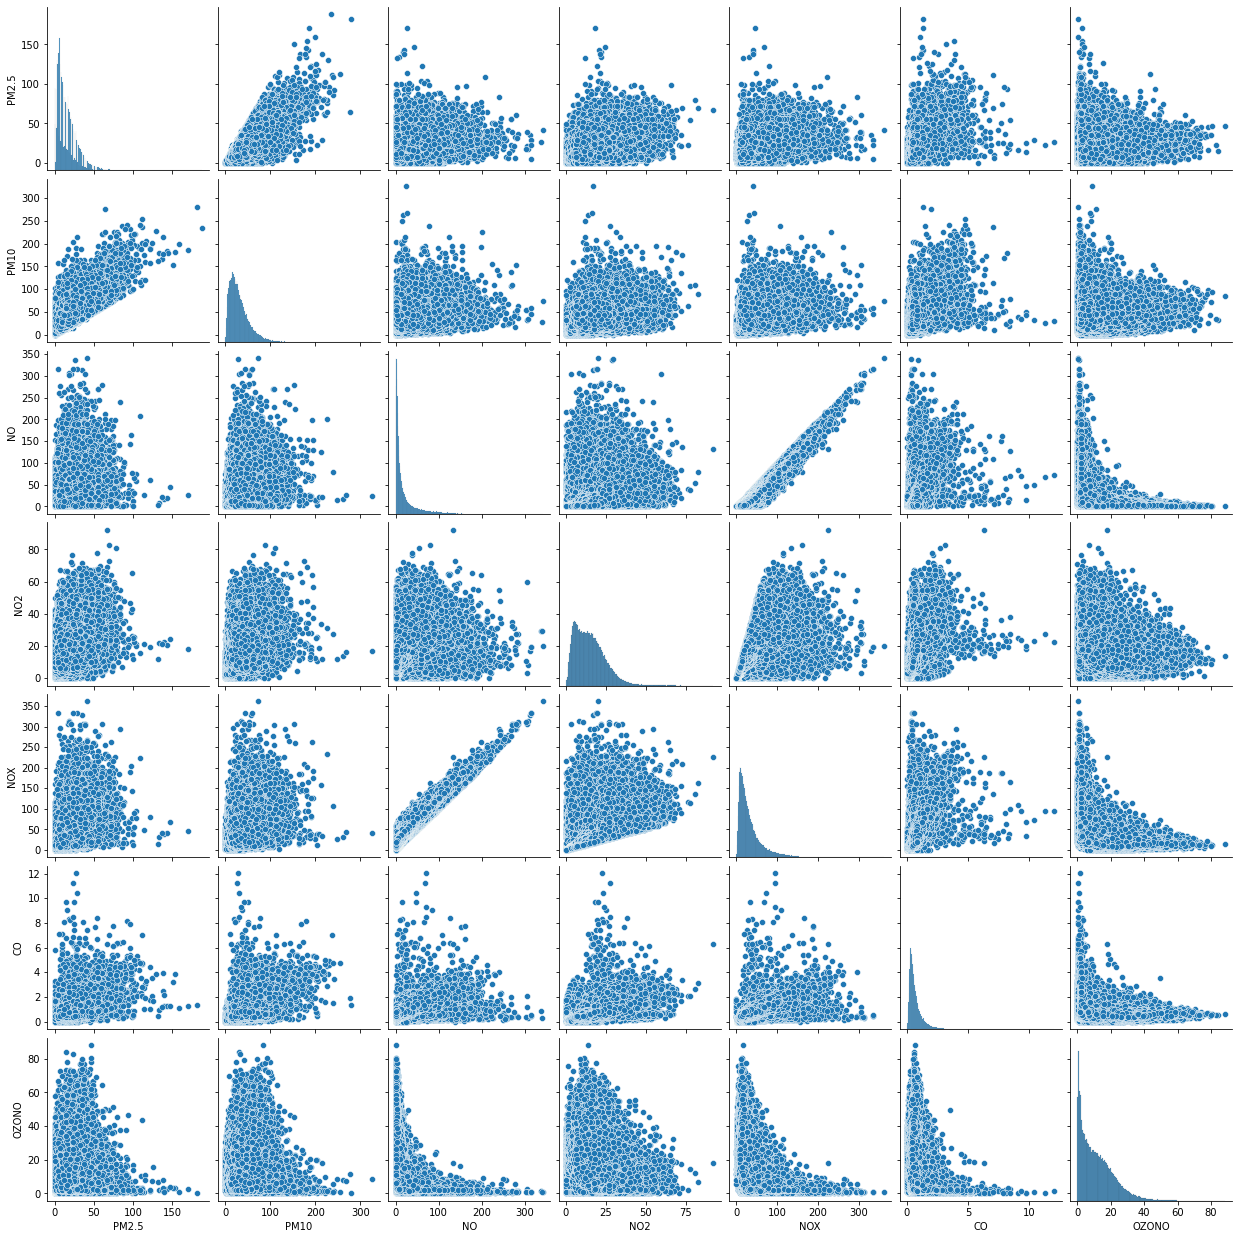

In [8]:
# generate a matrix of histograms and scatterplots of your data
sns.pairplot(raw_data[['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONO']])
plt.show()

## 8. Construct a corrlation matrix to quantitatively loook for correlation
You can use a **correlation matrix** to see how different variables correlate with each other. The correlation value is measured between -1 and 1. Numbers closer to 1 or -1 indicate higher levels of correlation between two variables, while values close to 0 indicate no significant correlation between two variables. You can ignore the 1's along the diagonal as those just represent the correlation of each variable with itself. Do you notice any significant correlations? How do these values compare to what you found in the scatterplots? 

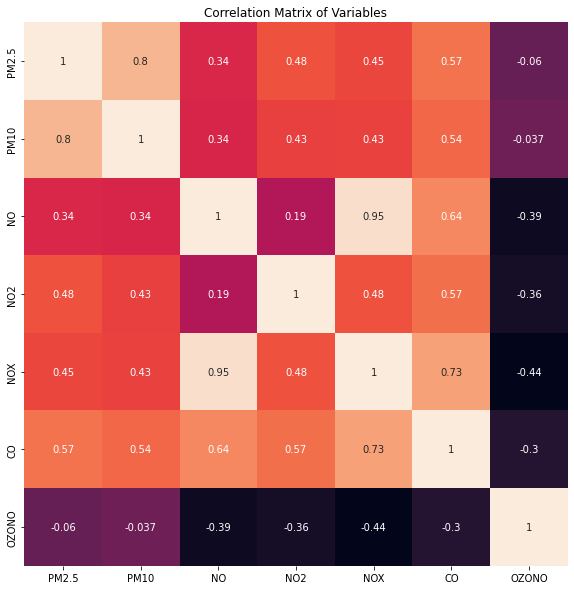

In [9]:
# generate a corrlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(raw_data[['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONO']].corr(), square=True, annot=True, cbar=False)
plt.title('Correlation Matrix of Variables')

plt.show()

## 9. Look at measurements over time for different pollutants at different stations

Run the cell below to generate a plot of pollutant values over time as measured at a particular sensor station. You can use the pulldown menus to choose different stations and pollutants. You can also use the sliders to zoom in or out on a particular range of dates. It's also possible to edit the `start_date` and `end_date` values and run the code cell again to start with a different date range. Have a look across different pollutants and different stations. What do you notice about the time ranges where there's missing data?

In [10]:
# define the date range to show in the plot
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 1, 28)
# generate a time series plot of pollutant data for a paricular station
utils.factory_plot_time_series(raw_data, start_date, end_date, ['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONO'])

interactive(children=(Dropdown(description='Station', options=('USM', 'BOL', 'SUB', 'TUN', 'LFR', 'PTE', 'MAM'…

## 10. Visualize the data in a map representation

Run the next cell to generate a map based on the PM2.5 measurements across the city of Bogotá. Here you'll see a circle on the map at each sensor station location, where the circle is colored based on the annual average of PM2.5 measured at that location. You can click on each sensor location to see a plot of the hourly average (averaged over the whole year for each hour of the day) as well as the long-term average value and the recommended level of PM2.5. If you change where it says `hour` to `day_name` in the code, you'll see the daily average by day of the week in the plot when you click on each station. Have a look at the distribution of long-term averages by hour of day and day of the week at each station and see what you find!

In [11]:
# add some extra features like latitude and longitude to the data for mapping
raw_data = utils.add_extra_features(raw_data)

In [12]:
# generate a map representation of the data
temp_data = raw_data # You can filter a single month
x_variable = 'hour' # Options ['day_name', 'hour']
utils.leaflet_plot(temp_data[['Latitud', 'Longitud', 'PM2.5', 'Station', 'hour', 'day_name']], x_variable)

<Figure size 432x288 with 0 Axes>